This notebook shows you how to use Pandas from Python to explore epidemic data. We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

__I'm not an epidemiologist or a virologist and just exploring data, so I will not draw conclusions on that level nor base behavior or policy upon these explorations and _neither should you_. Even within a country the data is heavily biased, not in the least because of testing and measurement policies changing over time!__

Let's go! Remove the old dataset and get the current data from EU CDC.

In [63]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-30 17:32:32--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.98, 13.227.198.83, 13.227.198.54, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660888 (645K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 645.40K  --.-KB/s    in 0.1s    

2020-04-30 17:32:33 (4.46 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [660888/660888]



Get Pandas and NumPy for feature engineering and calculations and get our plots inline.

In [64]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe `df` directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [65]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia
1,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia
2,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia
3,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386,Asia
4,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386,Asia
5,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386,Asia
6,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386,Asia
7,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386,Asia
8,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386,Asia
9,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386,Asia


Use a `count` on columns to see how many missing values we have. We would like to analyze countries by `geoId`.

In [66]:
df.count()

dateRep                    14035
day                        14035
month                      14035
year                       14035
cases                      14035
deaths                     14035
countriesAndTerritories    14035
geoId                      14035
countryterritoryCode       14035
popData2018                14035
continentExp               14035
dtype: int64

Because we seemed to miss some `geoId` entries, we will drop those lines using `dropna`. They were cases from Namibia, where the country code is __NA__, which we now read as data. The resulting dataframe is pivoted so we get one row per date in `dateRep`, columns by `geoId` and the number of new `cases` and `deaths` for that date and country in the cells. Again, show the first 10 rows from our new dataframe `df_geo` to check the result of our `pivot`.

In [67]:
#df[df['geoId'].isna()]
df_geo = df.dropna(subset=['geoId']).pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
dateRep                                                   ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 414 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to get an idea of what's there.

In [68]:
df_geo.describe()

cases                                                           \
geoId         AD          AE          AF         AG         AI         AL   
count  48.000000  116.000000  112.000000  42.000000  35.000000  53.000000   
mean   15.687500  102.836207   17.401786   0.571429   0.085714  14.452830   
std    12.512387  183.938976   32.652266   1.327805   0.373491   8.356403   
min     0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
25%     5.750000    0.000000    0.000000   0.000000   0.000000   9.000000   
50%    13.500000    0.000000    0.000000   0.000000   0.000000  14.000000   
75%    24.250000   65.250000   26.250000   0.000000   0.000000  21.000000   
max    43.000000  549.000000  172.000000   6.000000   2.000000  34.000000   

                                                       ... deaths             \
geoId          AM         AO          AR           AT  ...     VC         VE   
count  113.000000  40.000000   55.000000   122.000000  ...   38.0  47.000000   
mean    17.097345   0.675000   77.672727   125.934426  ...    0.0   0.212766   
std     25.074875   1.185111   70.823216   221.282017  ...    0.0   0.549156   
min      0.000000   0.000000    0.000000     0.000000  ...    0.0   0.000000   
25%      0.000000   0.000000   11.000000     0.000000  ...    0.0   0.000000   
50%      0.000000   0.000000   75.000000     3.000000  ...    0.0   0.000000   
75%     34.000000   1.000000  119.500000   149.000000  ...    0.0   0.000000   
max     92.000000   5.000000  344.000000  1141.000000  ...    0.0   2.000000   

                                                                           \
geoId         VG         VI     VN         XK    YE         ZA         ZM   
count  35.000000  37.000000  118.0  46.000000  21.0  54.000000  43.000000   
mean    0.028571   0.108108    0.0   0.478261   0.0   1.907407   0.069767   
std     0.169031   0.314800    0.0   0.836371   0.0   3.066979   0.257770   
min     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
25%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
50%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
75%     0.000000   0.000000    0.0   1.000000   0.0   2.000000   0.000000   
max     1.000000   1.000000    0.0   3.000000   0.0  14.000000   1.000000   

                  
geoId         ZW  
count  41.000000  
mean    0.097561  
std     0.300406  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000  

[8 rows x 414 columns]

Get to know your data by visualization, in this case the number of new `cases` per day for my home country __NL__.

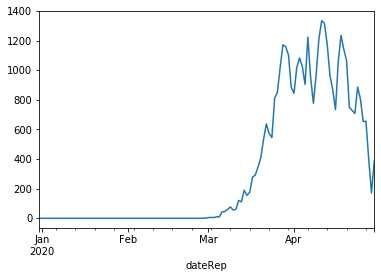

In [69]:
df_geo['cases']['NL'].plot()

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

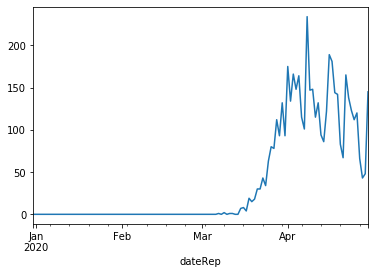

In [70]:
df_geo['deaths']['NL'].plot()

What would China look like?

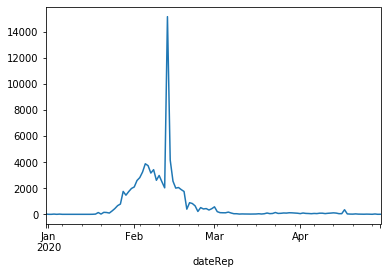

In [71]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases. When was that? We select lines for `cases` in __CN__ above 2500 and show the actual number.

In [72]:
df_geo[df_geo['cases']['CN'] > 2500]['cases']['CN']

dateRep
2020-02-02     2590.0
2020-02-03     2812.0
2020-02-04     3237.0
2020-02-05     3872.0
2020-02-06     3727.0
2020-02-07     3160.0
2020-02-08     3418.0
2020-02-09     2607.0
2020-02-10     2974.0
2020-02-13    15141.0
2020-02-14     4156.0
2020-02-15     2538.0
Name: CN, dtype: float64

So what does the original record look like? We select the full record for `geoId` __CN__ and the correct date.

In [73]:
df[(df['geoId'] == 'CN') & (df['dateRep'] == '2020-02-13')]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
2827,2020-02-13,13,2,2020,15141,254,China,CN,CHN,1392730000,Asia


After these selection examples we'll try some more advanced exploration. To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show __CN__ and __NL__.

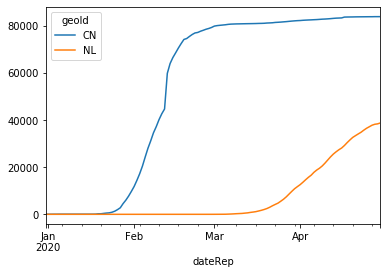

In [74]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


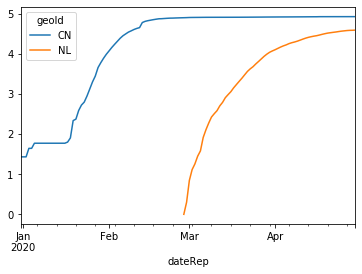

In [75]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

Alternatively, we ask `plot` to use a logarithmic scale.

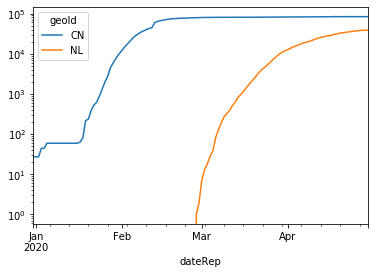

In [76]:
df_geo['cases'][['CN', 'NL']].cumsum().plot(logy=True)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we see measures take effect. Also, no real startup curve here.

Perhaps some other countries also show this effect, have a look at your own country!

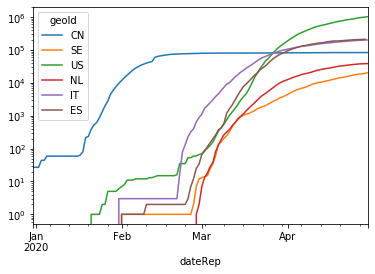

In [77]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another often used measure is relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method.

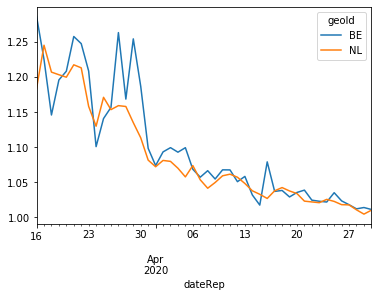

In [78]:
(df_geo.cumsum() / df_geo.shift().cumsum())['cases'][['BE', 'NL']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in over 14 days, which is a good sign (more about these 14 days later on). If this number keeps rising we will never get to the point where it doubles again.

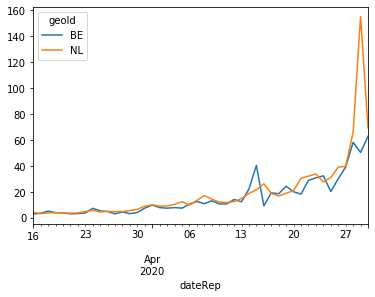

In [79]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['BE', 'NL']].loc['20200316':].plot()

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __BE__ and __NL__.

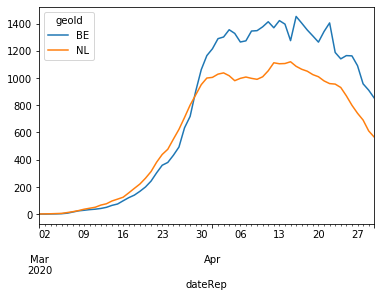

In [80]:
df_geo['cases'][['BE', 'NL']].rolling(7).mean().loc['20200301':].plot()

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a triangle function which will focus more on the recent values in the window.

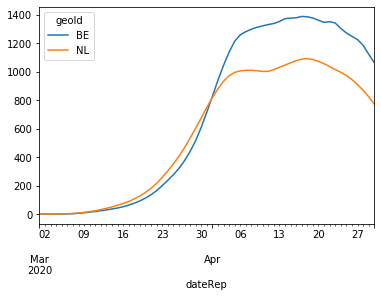

In [81]:
df_geo['cases'][['BE', 'NL']].rolling(14, win_type='triang').mean().loc['20200301':].plot()

Now let's have a look at _the curve_ which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top and so is France. We use a `sum` function to aggregate cases over the 14 day window.

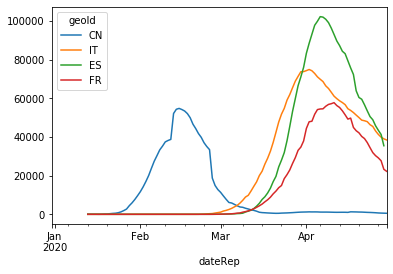

In [82]:
df_geo['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14).sum().plot()

Assuming that we see about 8% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

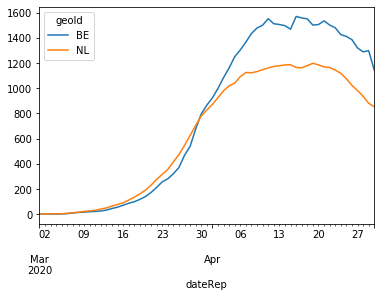

In [83]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.08).plot()

For __NL__ this more or less corresponds with the official ICU data. We don't clearly see the published drop in number of current patients yet, that is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [84]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.08).tail(14)

geoId,BE,NL
dateRep,,
2020-04-17,1556.88,1161.36
2020-04-18,1549.44,1178.08
2020-04-19,1500.16,1196.96
2020-04-20,1504.40,1184.32
2020-04-21,1533.52,1168.16
2020-04-22,1500.96,1164.32
2020-04-23,1478.88,1143.44
2020-04-24,1425.12,1117.36
2020-04-25,1410.08,1075.04


The structure of our dataframe lends itself to exploring all kinds of other measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous `R` measure. We use a triangular window for smoothing.

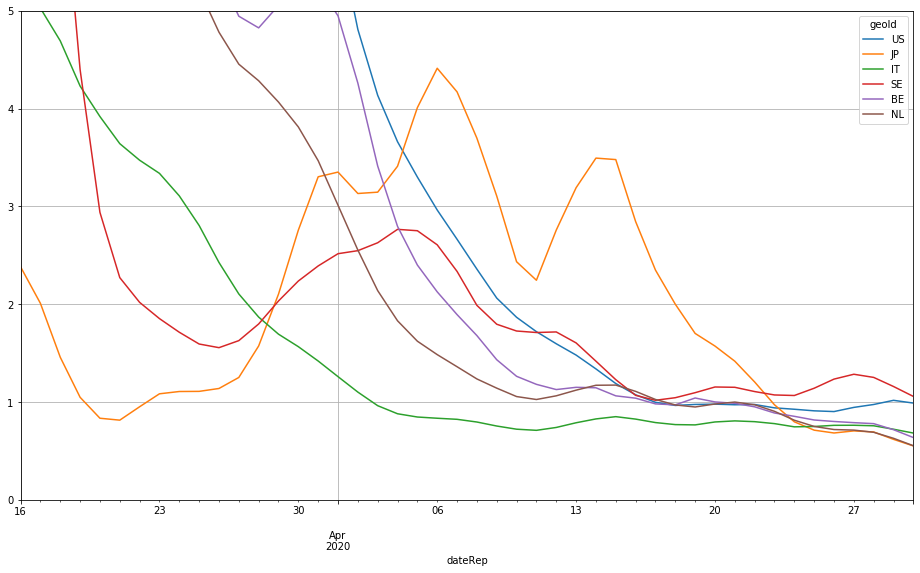

In [85]:
(df_geo.rolling(7, win_type='triang').mean() /\
 df_geo.shift(7).rolling(14, win_type='triang').mean())\
['cases'][['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].\
plot(figsize=(16, 9), grid=True, ylim=(0, 5))

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate _for known cases_, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

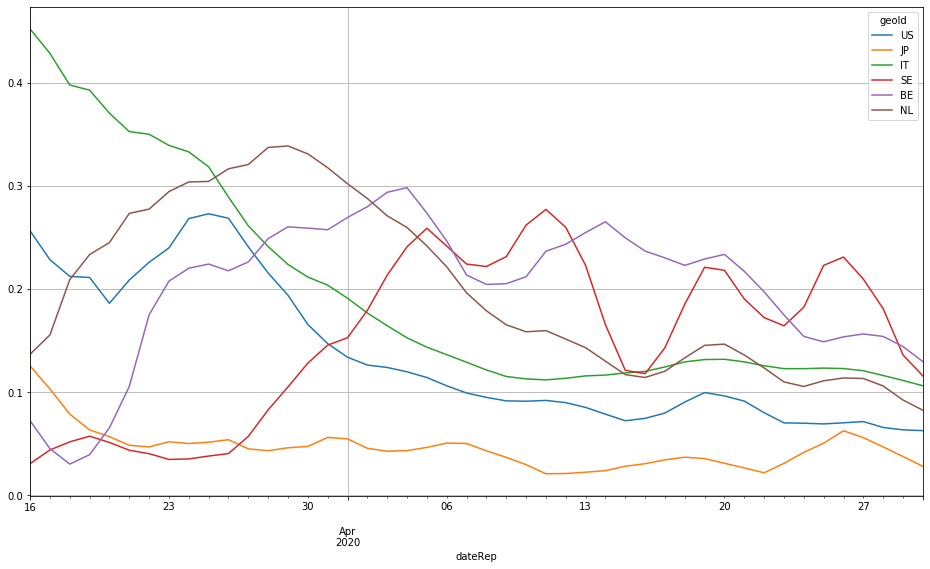

In [86]:
(df_geo.rolling(7, win_type='triang').mean()['deaths'] /\
 df_geo.shift(7).rolling(14, win_type='triang').mean()['cases'])\
[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].\
plot(figsize=(16, 9), grid=True)

Instead of plotting you can also use aggregate functions at the end, such as `mean`. Again, a lot of information about the underlying assumptions and policies would be needed to interpret these numbers correctly. The numbers below are actually more a measure of test intensity, e.g. if you only test people with heavy symptoms the fatality rate will be high.

In [87]:
(df_geo.rolling(7, win_type='triang').mean()['deaths'] /\
 df_geo.shift(7).rolling(14, win_type='triang').mean()['cases'])\
[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200316':].mean()

geoId
US    0.135151
JP    0.045706
IT    0.196175
SE    0.151111
BE    0.199629
NL    0.198528
dtype: float64

Just a quick look to check the lag for `deaths` from `cases`.

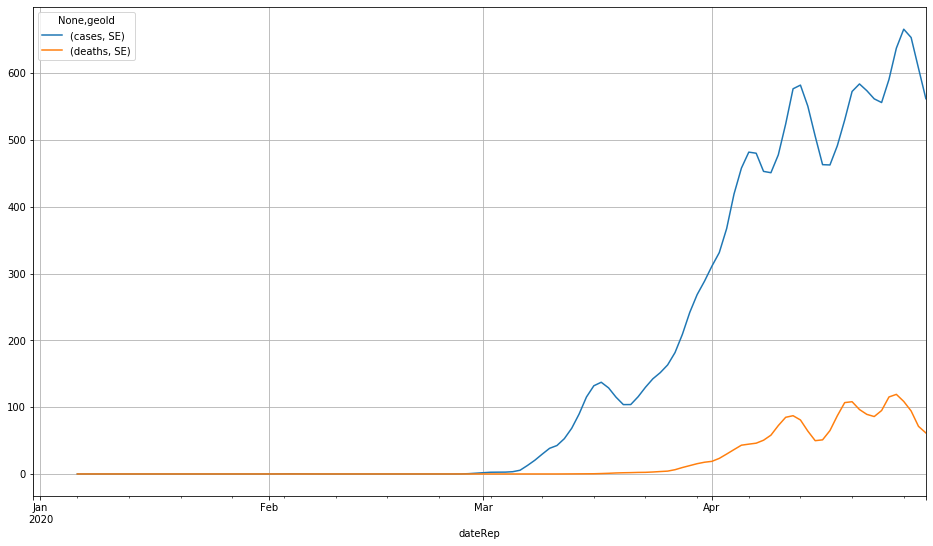

In [88]:
df_geo.rolling(7, win_type='triang').mean().\
plot(y=[('cases', 'SE'), ('deaths', 'SE')], figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.